In [78]:
import numpy as np
import matplotlib.pyplot as plt
import pyaudio
import wave
import padasip as pa 

In [571]:
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 22050
CHUNK = 2048
RECORD_SECONDS = 20
WAVE_OUTPUT_FILENAME = "file.wav"
 
audio = pyaudio.PyAudio()
 
# start Recording
stream = audio.open(format=FORMAT, channels=CHANNELS,
                rate=RATE, input=True,
                frames_per_buffer=CHUNK)
player = audio.open(format=pyaudio.paInt16, channels=1, rate=RATE, output=True, frames_per_buffer=CHUNK)
print("recording and playing...")
frames = []
M=4
delay=10000
x = list(np.zeros(M+1 + delay) )
e = np.zeros(CHUNK)
y = np.zeros(CHUNK)
mu = 90e-2
w = np.random.normal(0*mu,1*mu,M)
chunk_no=0
y_hist = []
for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
    data = stream.read(CHUNK) # lê entrada do microfone
    d = np.fromstring(data,dtype=np.int16)/32768 
    y[:M] = y[-M:]
    e[:M] = e[-M:]
    x.extend(list(d))
    for j in range(0,CHUNK): # LMS por chunk
        xPart = np.array(x[chunk_no*CHUNK+j:chunk_no*CHUNK+j+M])
        y[j] = xPart.dot(w)
        e[j] = d[j] - y[j]
        w =w + mu*e[j]*xPart
    y_hist.extend(np.array((y*32768),dtype =np.int16))
    player.write(np.array((10*y*32768/(2*mu)),dtype =np.int16),CHUNK) # Escreve a saída do filtro no buffer de saída de áudio
    #player.write(np.array((d*32768),dtype =np.int16),CHUNK)
    chunk_no+=1
    #frames.append(data)
print("finished recording")
 
 
# stop Recording
stream.stop_stream()
stream.close()
player.stop_stream()
player.close()
audio.terminate()
 
# waveFile = wave.open(WAVE_OUTPUT_FILENAME, 'wb')
# waveFile.setnchannels(CHANNELS)
# waveFile.setsampwidth(audio.get_sample_size(FORMAT))
# waveFile.setframerate(RATE)
# waveFile.writeframes(b''.join(frames))
# waveFile.close()

recording and playing...


c:\users\pedro\miniconda3\envs\dev_pedro\lib\site-packages\ipykernel_launcher.py:28: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


finished recording


In [256]:
stream.stop_stream()
stream.close()
player.stop_stream()
player.close()
audio.terminate()

In [296]:
xPart.shape

(15,)

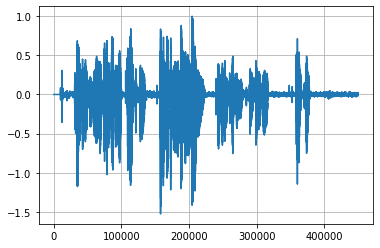

In [559]:
plt.plot(x/np.max(x))
plt.grid(True)
plt.title('Sinal Ruidoso')
plt.xlabel('n')
plt.ylabel('Amplitude')

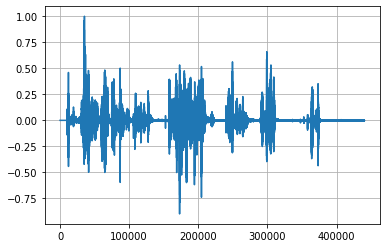

In [558]:
plt.plot(y_hist/np.max(y_hist))
plt.grid(True)
plt.title('Sinal filtrado')
plt.xlabel('n')
plt.ylabel('Amplitude')

In [560]:
import IPython.display as ipd
ipd.Audio(y_hist,rate=RATE)

In [561]:
ipd.Audio(x,rate=RATE)

In [393]:
def wada_snr(wav):
    # Direct blind estimation of the SNR of a speech signal.
    #
    # Paper on WADA SNR:
    #   http://www.cs.cmu.edu/~robust/Papers/KimSternIS08.pdf
    #
    # This function was adapted from this matlab code:
    #   https://labrosa.ee.columbia.edu/projects/snreval/#9

    # init
    eps = 1e-10
    # next 2 lines define a fancy curve derived from a gamma distribution -- see paper
    db_vals = np.arange(-20, 101)
    g_vals = np.array([0.40974774, 0.40986926, 0.40998566, 0.40969089, 0.40986186, 0.40999006, 0.41027138, 0.41052627, 0.41101024, 0.41143264, 0.41231718, 0.41337272, 0.41526426, 0.4178192 , 0.42077252, 0.42452799, 0.42918886, 0.43510373, 0.44234195, 0.45161485, 0.46221153, 0.47491647, 0.48883809, 0.50509236, 0.52353709, 0.54372088, 0.56532427, 0.58847532, 0.61346212, 0.63954496, 0.66750818, 0.69583724, 0.72454762, 0.75414799, 0.78323148, 0.81240985, 0.84219775, 0.87166406, 0.90030504, 0.92880418, 0.95655449, 0.9835349 , 1.01047155, 1.0362095 , 1.06136425, 1.08579312, 1.1094819 , 1.13277995, 1.15472826, 1.17627308, 1.19703503, 1.21671694, 1.23535898, 1.25364313, 1.27103891, 1.28718029, 1.30302865, 1.31839527, 1.33294817, 1.34700935, 1.3605727 , 1.37345513, 1.38577122, 1.39733504, 1.40856397, 1.41959619, 1.42983624, 1.43958467, 1.44902176, 1.45804831, 1.46669568, 1.47486938, 1.48269965, 1.49034339, 1.49748214, 1.50435106, 1.51076426, 1.51698915, 1.5229097 , 1.528578  , 1.53389835, 1.5391211 , 1.5439065 , 1.54858517, 1.55310776, 1.55744391, 1.56164927, 1.56566348, 1.56938671, 1.57307767, 1.57654764, 1.57980083, 1.58304129, 1.58602496, 1.58880681, 1.59162477, 1.5941969 , 1.59693155, 1.599446  , 1.60185011, 1.60408668, 1.60627134, 1.60826199, 1.61004547, 1.61192472, 1.61369656, 1.61534074, 1.61688905, 1.61838916, 1.61985374, 1.62135878, 1.62268119, 1.62390423, 1.62513143, 1.62632463, 1.6274027 , 1.62842767, 1.62945532, 1.6303307 , 1.63128026, 1.63204102])

    # peak normalize, get magnitude, clip lower bound
    wav = np.array(wav)
    wav = wav / abs(wav).max()
    abs_wav = abs(wav)
    abs_wav[abs_wav < eps] = eps

    # calcuate statistics
    # E[|z|]
    v1 = max(eps, abs_wav.mean())
    # E[log|z|]
    v2 = np.log(abs_wav).mean()
    # log(E[|z|]) - E[log(|z|)]
    v3 = np.log(v1) - v2

    # table interpolation
    wav_snr_idx = None
    if any(g_vals < v3):
        wav_snr_idx = np.where(g_vals < v3)[0].max()
    # handle edge cases or interpolate
    if wav_snr_idx is None:
        wav_snr = db_vals[0]
    elif wav_snr_idx == len(db_vals) - 1:
        wav_snr = db_vals[-1]
    else:
        wav_snr = db_vals[wav_snr_idx] + \
            (v3-g_vals[wav_snr_idx]) / (g_vals[wav_snr_idx+1] - \
            g_vals[wav_snr_idx]) * (db_vals[wav_snr_idx+1] - db_vals[wav_snr_idx])

    # Calculate SNR
    dEng = sum(wav**2)
    dFactor = 10**(wav_snr / 10)
    dNoiseEng = dEng / (1 + dFactor) # Noise energy
    dSigEng = dEng * dFactor / (1 + dFactor) # Signal energy
    snr = 10 * np.log10(dSigEng / dNoiseEng)

    return snr

In [404]:
wada_snr(np.array(y_hist)-np.mean(y_hist)),wada_snr(x)

(37.61546073332675, 27.777937356738583)

In [402]:
np.mean(x)

-7.423756277311221e-06

Text(0, 0.5, 'Amplitude')

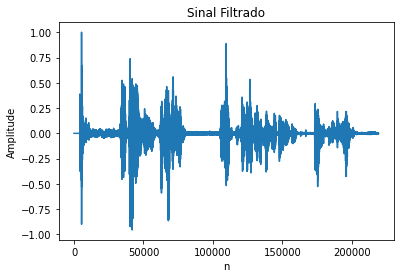

In [569]:
import audiofile as af
result,sr = af.read('real_time_result.wav')
plt.plot(result)
plt.title('Sinal Filtrado')
plt.xlabel('n')
plt.ylabel('Amplitude')

Text(0, 0.5, 'Amplitude')

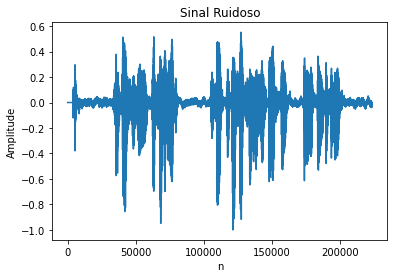

In [570]:
orig,sr = af.read('real_time_orig.wav')
plt.plot(orig)
plt.title('Sinal Ruidoso')
plt.xlabel('n')
plt.ylabel('Amplitude')